<a href="https://colab.research.google.com/github/rhmdnrhuda/RNN-Exploration/blob/master/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Eksplorasi RNN menggunakan Keras

Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Clone github untuk mengambil data set baik itu training maupun testing

In [0]:
!git clone https://github.com/rhmdnrhuda/RNN-Exploration

Cloning into 'RNN-Exploration'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


Import data traing

In [0]:
dataset_train = pd.read_csv('RNN-Exploration/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

Feature Scalling

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Membuat struktur data dengan 60 timestamp dan 1 output

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##Membuat RNN

Import library Keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Inisiasi RNN

In [0]:
regressor = Sequential()

Menambahkan layer pertama LSTM dan beberapa Dropout Regularisation

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Menambahkan Layer kedua

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Menambahkan Layer ketiga

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Menambahkan Layer keempat

In [0]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Menambahkan Output Layer

In [0]:
regressor.add(Dense(units = 1))

Model 1:  optimizer = adam  dan batch_size = 32

Compiling RNN

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting RNN ke Data Training

In [0]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 12s 10ms/step - loss: 0.0559
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0054
Epoch 10/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================]

Mengambil data testing

In [0]:
dataset_test = pd.read_csv('RNN-Exploration/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

Membuat prediksi stock price pada 2017

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Menampilkan hasil

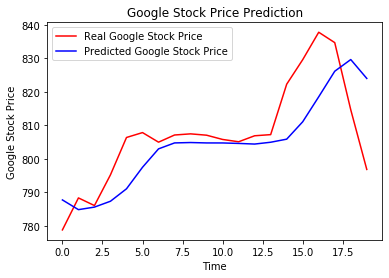

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Model 2: Optimizer = sgd dan batch_size = 32

In [0]:
regressor.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 15s 12ms/step - loss: 0.0888
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0589
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0488
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0329
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0167
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0072
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0051
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [=============

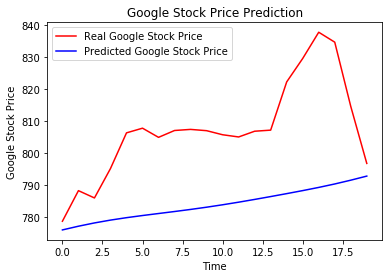

In [0]:
dataset_test = pd.read_csv('RNN-Exploration/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Model 3:  oprimizer = adam dan batch_size = 16

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 13s 11ms/step - loss: 0.0264
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0045
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0042
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0040
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0038
Epoch 8/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0031
Epoch 11/100
1198/1198 [======================

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

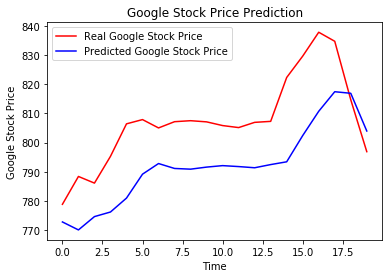

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()